# Librerías

In [1]:
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import itertools
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

# Importación y limpieza inicial

In [2]:
penguins = sns.load_dataset('penguins')
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
print(len(penguins))

344


In [4]:
nans = penguins[penguins.isna().any(axis=1)]

print(nans)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.

In [5]:
penguins = penguins.dropna()

print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [6]:
print(len(penguins))

333


In [7]:
variables = list(penguins)
print(variables)
variables_numericas = penguins.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
print(variables_numericas)
variables_categoricas = [variable for variable in variables if variable not in variables_numericas]
print(variables_categoricas)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
['species', 'island', 'sex']


In [8]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

# Descriptivos estadísticos básicos

In [9]:
# Descriptivos variables numéricas mediante función describe() de Python
descriptivos_num = penguins.describe().T

# Añadimos más descriptivos a los anteriores
for num in variables_numericas:
    descriptivos_num.loc[num, "Asimetria"] = penguins[num].skew()
    descriptivos_num.loc[num, "Kurtosis"] = penguins[num].kurtosis()
    descriptivos_num.loc[num, "Rango"] = np.ptp(penguins[num].dropna().values)

descriptivos_num

count         mean         std     min     25%     50%  \
bill_length_mm     333.0    43.992793    5.468668    32.1    39.5    44.5   
bill_depth_mm      333.0    17.164865    1.969235    13.1    15.6    17.3   
flipper_length_mm  333.0   200.966967   14.015765   172.0   190.0   197.0   
body_mass_g        333.0  4207.057057  805.215802  2700.0  3550.0  4050.0   

                      75%     max  Asimetria  Kurtosis   Rango  
bill_length_mm       48.6    59.6   0.045340 -0.883418    27.5  
bill_depth_mm        18.7    21.5  -0.149720 -0.891960     8.4  
flipper_length_mm   213.0   231.0   0.360148 -0.961241    59.0  
body_mass_g        4775.0  6300.0   0.472246 -0.733489  3600.0

In [10]:
# penguins.to_csv('penguins_clean.csv', index=False)

# Visualizaciones de los datos

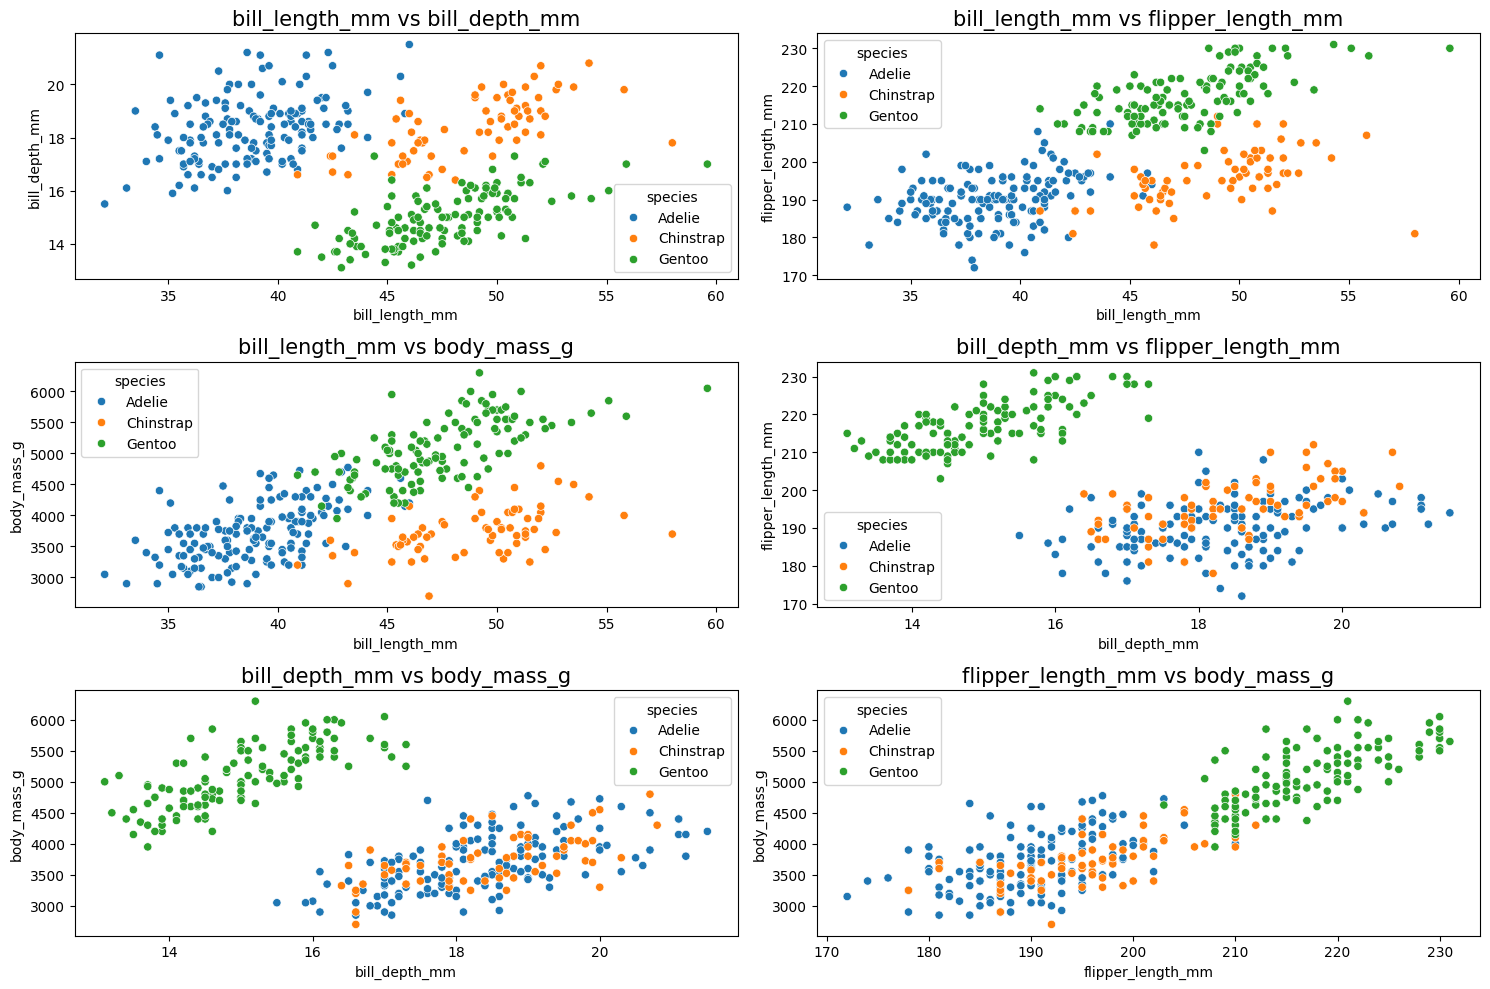

In [11]:
combinations = list(itertools.combinations(variables_numericas, 2))

plt.figure(figsize=(15, 10))

for i, (x_var, y_var) in enumerate(combinations, 1):
    plt.subplot(len(combinations)//2, 2, i) 
    sns.scatterplot(x=x_var, y=y_var, data=penguins, hue="species")
    plt.title(f"{x_var} vs {y_var}", size=15)

plt.tight_layout()
plt.show()

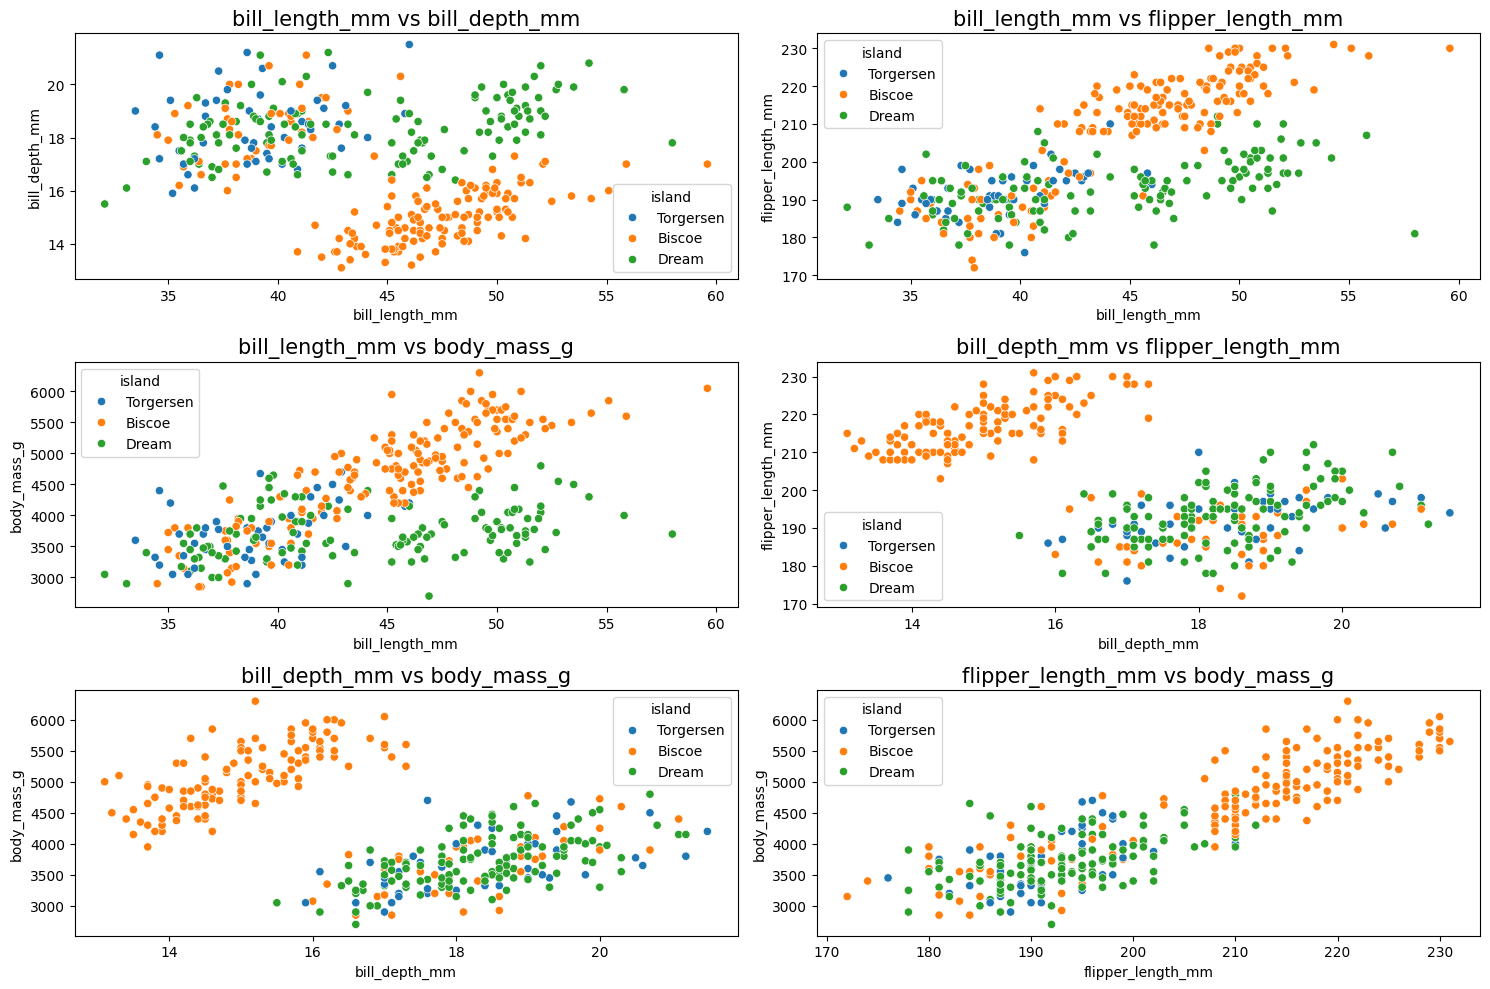

In [12]:
plt.figure(figsize=(15, 10))

for i, (x_var, y_var) in enumerate(combinations, 1):
    plt.subplot(len(combinations)//2, 2, i) 
    sns.scatterplot(x=x_var, y=y_var, data=penguins, hue="island")
    plt.title(f"{x_var} vs {y_var}", size=15)

plt.tight_layout()
plt.show()

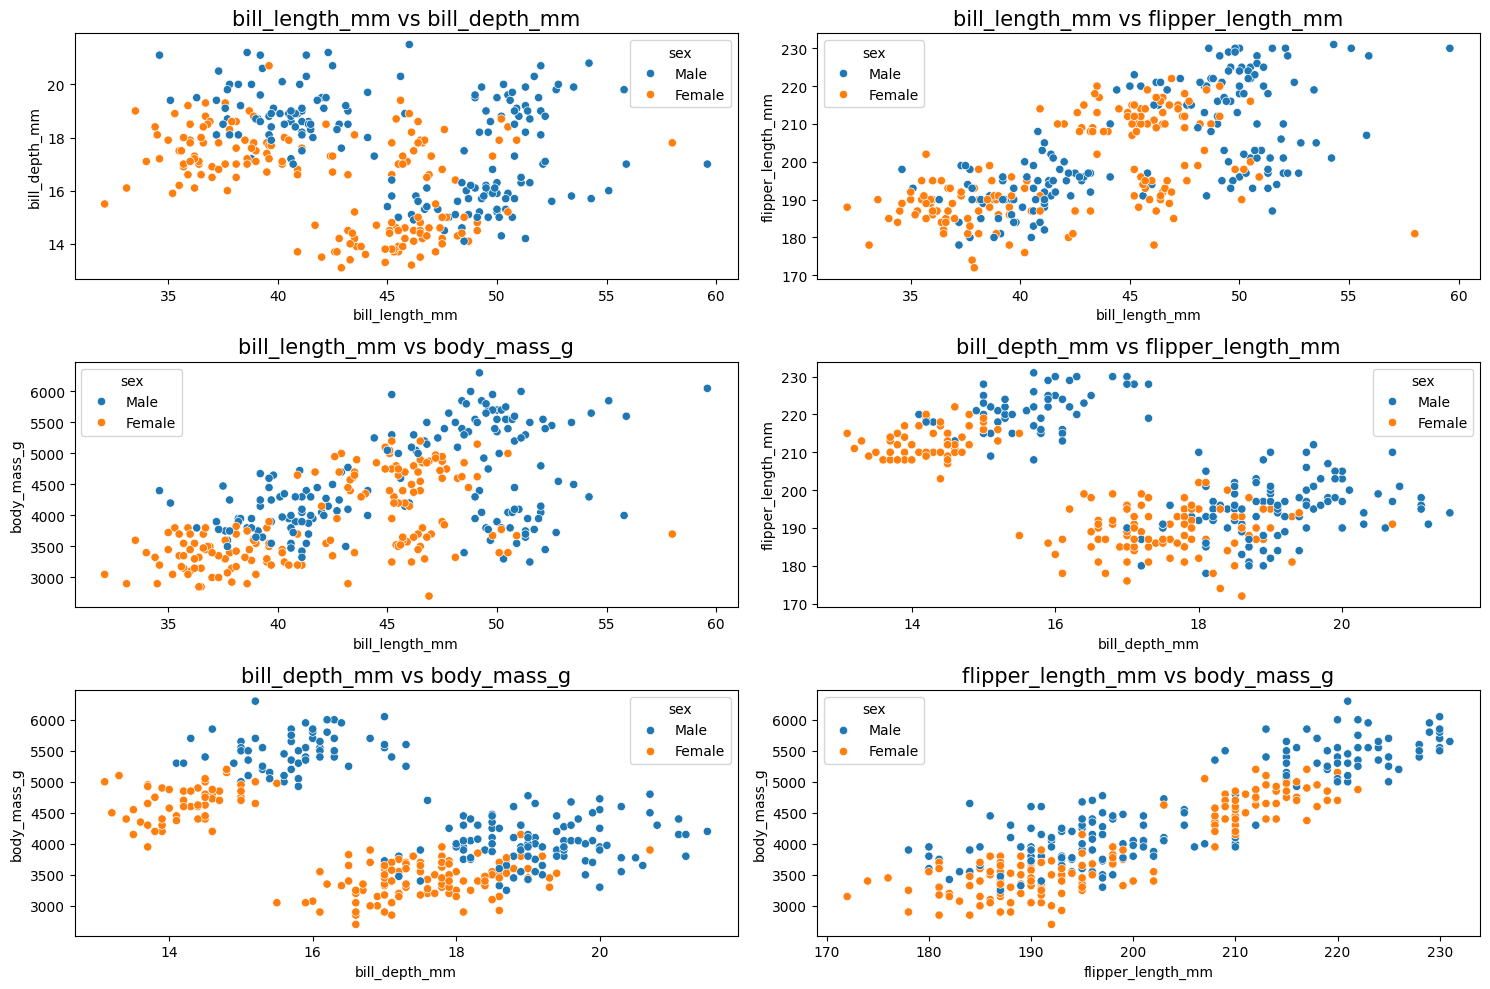

In [13]:
plt.figure(figsize=(15, 10))

for i, (x_var, y_var) in enumerate(combinations, 1):
    plt.subplot(len(combinations)//2, 2, i) 
    sns.scatterplot(x=x_var, y=y_var, data=penguins, hue="sex")
    plt.title(f"{x_var} vs {y_var}", size=15)

plt.tight_layout()
plt.show()

In [14]:
for var in variables_numericas:
    fig = px.histogram(penguins, x=var, color="species", marginal="box", 
                        title=f'Distribución de {var} por especie')
    fig.show()

# Matriz de correlación

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17164\2003002309.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

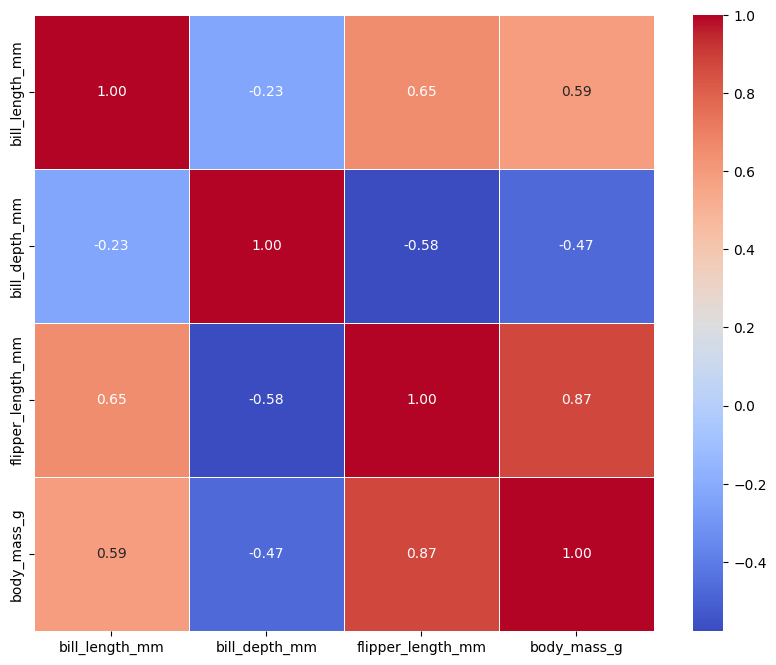

In [15]:
R = penguins.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(R, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Estandarizamos los datos

In [16]:
scaler = StandardScaler()
penguins_numericas_estandarizadas = pd.DataFrame(
    scaler.fit_transform(penguins[variables_numericas]),
    columns=['{}_z'.format(variable) for variable in variables_numericas], 
    index=penguins.index  # Mantenemos los índices del DataFrame original
)

penguins_estandarizadas = pd.concat([penguins_numericas_estandarizadas, penguins[['species', 'island', 'sex']]], axis=1)

print(penguins_estandarizadas.head())

   bill_length_mm_z  bill_depth_mm_z  flipper_length_mm_z  body_mass_g_z  \
0         -0.896042         0.780732            -1.426752      -0.568475   
1         -0.822788         0.119584            -1.069474      -0.506286   
2         -0.676280         0.424729            -0.426373      -1.190361   
4         -1.335566         1.085877            -0.569284      -0.941606   
5         -0.859415         1.747026            -0.783651      -0.692852   

  species     island     sex  
0  Adelie  Torgersen    Male  
1  Adelie  Torgersen  Female  
2  Adelie  Torgersen  Female  
4  Adelie  Torgersen  Female  
5  Adelie  Torgersen    Male  


# PCA Inicial

In [17]:
# Inicializamos PCA, esta vez no especificamos el número de componentes para obtener todos
pca = PCA()

# Ajustamos PCA a los datos estandarizados
fit = pca.fit(penguins_numericas_estandarizadas)

In [18]:
matriz_covarianzas = pca.get_covariance()
df_matriz_covarianzas = pd.DataFrame(
    matriz_covarianzas, 
    index=penguins_numericas_estandarizadas.columns, 
    columns=penguins_numericas_estandarizadas.columns
)

print(df_matriz_covarianzas)

                     bill_length_mm_z  bill_depth_mm_z  flipper_length_mm_z  \
bill_length_mm_z             1.003012        -0.229314             0.655063   
bill_depth_mm_z             -0.229314         1.003012            -0.579532   
flipper_length_mm_z          0.655063        -0.579532             1.003012   
body_mass_g_z                0.591227        -0.473437             0.875608   

                     body_mass_g_z  
bill_length_mm_z          0.591227  
bill_depth_mm_z          -0.473437  
flipper_length_mm_z       0.875608  
body_mass_g_z             1.003012  


In [19]:
# Obtener los autovalores asociados a cada componente principal
autovalores = fit.explained_variance_
print(autovalores)

[2.75362487 0.7804609  0.36975289 0.10820954]


In [20]:
# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total
var_explicada = fit.explained_variance_ratio_ * 100
print(var_explicada)

[68.63389314 19.45292928  9.21606299  2.69711459]


In [21]:
# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal
var_acumulada = np.cumsum(var_explicada)
print(var_acumulada)

[ 68.63389314  88.08682242  97.30288541 100.        ]


In [22]:
# Crear un DataFrame de pandas con los datos anteriores
data = {'Autovalores': autovalores, 'Variabilidad Explicada (%)': var_explicada, 'Variabilidad Acumulada (%)': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, len(autovalores)+1)])
# Imprimir la tabla
print(tabla)


              Autovalores  Variabilidad Explicada (%)  \
Componente 1     2.753625                   68.633893   
Componente 2     0.780461                   19.452929   
Componente 3     0.369753                    9.216063   
Componente 4     0.108210                    2.697115   

              Variabilidad Acumulada (%)  
Componente 1                   68.633893  
Componente 2                   88.086822  
Componente 3                   97.302885  
Componente 4                  100.000000  


In [23]:
# Transformar los datos según los componentes principales para obtener las nuevas coordenadas
resultados_pca = pd.DataFrame(fit.transform(penguins_numericas_estandarizadas),
                              columns=['Componente {}'.format(i) for i in range(1, len(autovalores)+1)],
                              index=penguins_numericas_estandarizadas.index)

print(resultados_pca.head())

   Componente 1  Componente 2  Componente 3  Componente 4
0     -1.853593      0.032069     -0.234902      0.528397
1     -1.316254     -0.443527     -0.027470      0.401727
2     -1.376605     -0.161230      0.189689     -0.528662
4     -1.885288     -0.012351     -0.628873     -0.472893
5     -1.919981      0.817598     -0.701051     -0.196416


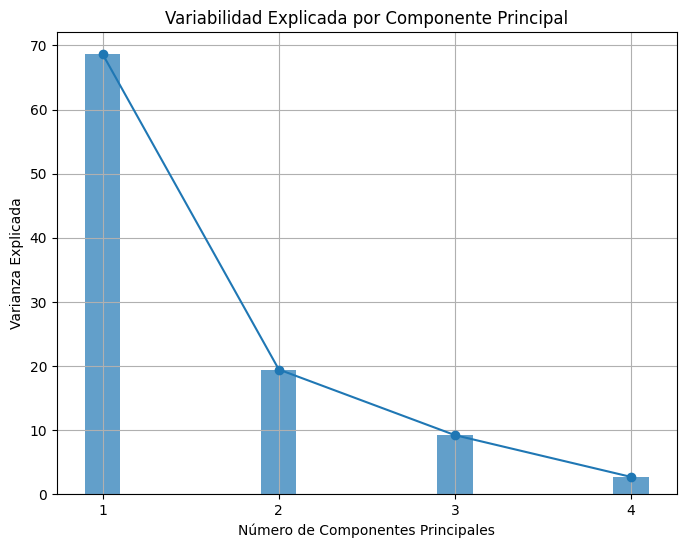

In [24]:
# Representacion de la variabilidad explicada:   

def plot_varianza_explicada(var_explicada, n_components):
    """
    Representa la variabilidad explicada 
    Args:
      var_explicada (array): Un array que contiene el porcentaje de varianza explicada
        por cada componente principal. Generalmente calculado como
        var_explicada = fit.explained_variance_ratio_ * 100.
      n_components (int): El número total de componentes principales.
        Generalmente calculado como fit.n_components.
    """  
    # Crear un rango de números de componentes principales de 1 a n_components
    num_componentes_range = np.arange(1, n_components + 1)

    # Crear una figura de tamaño 8x6
    plt.figure(figsize=(8, 6))

    # Trazar la varianza explicada en función del número de componentes principales
    plt.plot(num_componentes_range, var_explicada, marker='o')

    # Etiquetas de los ejes x e y
    plt.xlabel('Número de Componentes Principales')
    plt.ylabel('Varianza Explicada')

    # Título del gráfico
    plt.title('Variabilidad Explicada por Componente Principal')

    # Establecer las marcas en el eje x para que coincidan con el número de componentes
    plt.xticks(num_componentes_range)

    # Mostrar una cuadrícula en el gráfico
    plt.grid(True)

    # Agregar barras debajo de cada punto para representar el porcentaje de variabilidad explicada
    # - 'width': Ancho de las barras de la barra. En este caso, se establece en 0.2 unidades.
    # - 'align': Alineación de las barras con respecto a los puntos en el eje x. 
    #   'center' significa que las barras estarán centradas debajo de los puntos.
    # - 'alpha': Transparencia de las barras. Un valor de 0.7 significa que las barras son 70% transparentes.
    plt.bar(num_componentes_range, var_explicada, width=0.2, align='center', alpha=0.7)

    # Mostrar el gráfico
    plt.show()
    
plot_varianza_explicada(var_explicada, fit.n_components_)

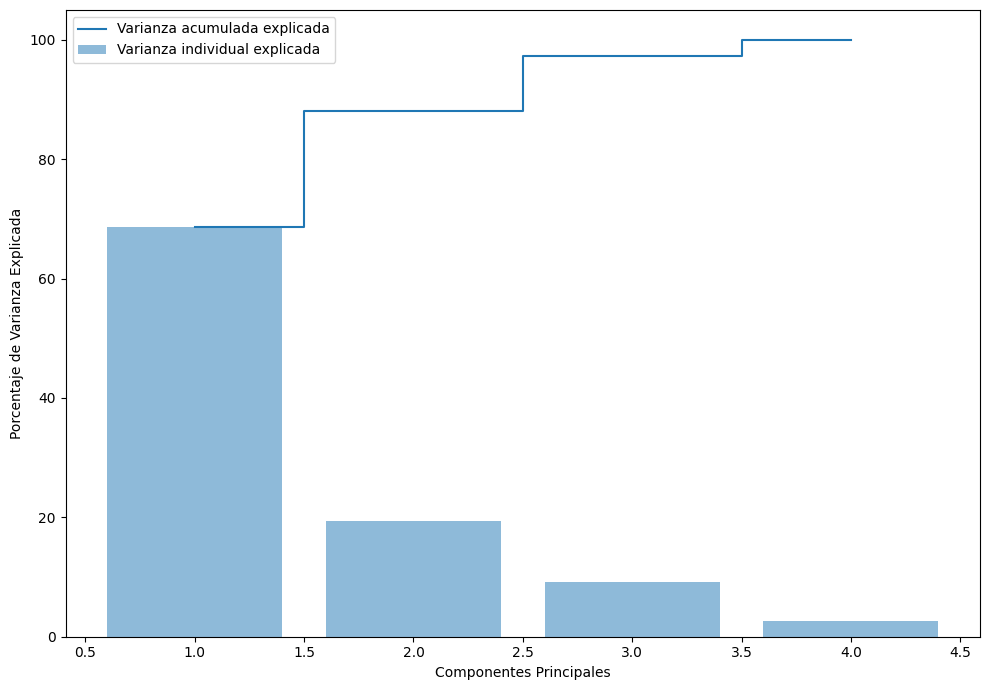

In [25]:
# Gráfico de varianza explicada
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(var_explicada)+1), var_explicada, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(var_acumulada)+1), var_acumulada, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
cargas_pca = pd.DataFrame(
    pca.components_.T, 
    index=penguins_numericas_estandarizadas.columns, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print(cargas_pca[['PC1', 'PC2','PC3','PC4']])

                          PC1       PC2       PC3       PC4
bill_length_mm_z     0.453753  0.600195  0.642495  0.145170
bill_depth_mm_z     -0.399047  0.796170 -0.425800 -0.159904
flipper_length_mm_z  0.576825  0.005788 -0.236095 -0.781984
body_mass_g_z        0.549675  0.076464 -0.591737  0.584686


In [27]:
fig = make_subplots(rows=2,cols=2, 
                    subplot_titles=['PC1','PC2','PC3','PC4'])
fig.add_trace(go.Bar(x=cargas_pca['PC1'],
              y=cargas_pca.index,name='PC1',
              orientation='h'), row=1,col=1)
fig.add_trace(go.Bar(x=cargas_pca['PC2'],
              y=cargas_pca.index,name='PC2',
              orientation='h'), row=1,col=2)
fig.add_trace(go.Bar(x=cargas_pca['PC3'],
              y=cargas_pca.index,name='PC3',
              orientation='h'), row=2,col=1)
fig.add_trace(go.Bar(x=cargas_pca['PC4'],
              y=cargas_pca.index,name='PC4',
              orientation='h'), row=2,col=2)
fig.show()

# PCA: dos componentes

In [28]:
# Crea una instancia de Análisis de Componentes Principales (ACP):
# - Utilizamos PCA(n_components=7) para crear un objeto PCA que realizará un análisis de componentes principales.
# - Establecemos n_components en 7 para retener el maximo de las componentes principales (maximo= numero de variables).
pca2 = PCA(n_components=2)

# Aplicar el Análisis de Componentes Principales (ACP) a los datos estandarizados:
# - Usamos pca.fit(notas_estandarizadas) para ajustar el modelo de ACP a los datos estandarizados.
fit2 = pca2.fit(penguins_numericas_estandarizadas)

In [29]:
# Obtener los autovalores asociados a cada componente principal.
autovalores2 = fit2.explained_variance_
print(autovalores2)

[2.75362487 0.7804609 ]


In [30]:
# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada2 = fit2.explained_variance_ratio_*100
print(var_explicada2)

[68.63389314 19.45292928]


In [31]:
# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada2 = np.cumsum(var_explicada2)
print(var_acumulada2)

[68.63389314 88.08682242]


In [32]:
# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
data2 = {'Autovalores': autovalores2, 'Variabilidad Explicada': var_explicada2, 'Variabilidad Acumulada': var_acumulada2}
tabla2 = pd.DataFrame(data2, index=['Componente {}'.format(i) for i in range(1, fit2.n_components_+1)]) 

# Imprimir la tabla
print(tabla2)

              Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1     2.753625               68.633893               68.633893
Componente 2     0.780461               19.452929               88.086822


In [33]:
resultados_pca2 = pd.DataFrame(fit2.transform(penguins_numericas_estandarizadas), 
                              columns=['Componente {}'.format(i) for i in range(1, fit2.n_components_+1)],
                              index=penguins_numericas_estandarizadas.index)
print(resultados_pca2)

     Componente 1  Componente 2
0       -1.853593      0.032069
1       -1.316254     -0.443527
2       -1.376605     -0.161230
4       -1.885288     -0.012351
5       -1.919981      0.817598
..            ...           ...
338      1.997716     -0.976771
340      1.832651     -0.784510
341      2.751505      0.266556
342      1.713854     -0.725875
343      2.018537      0.336554

[333 rows x 2 columns]


In [34]:
# Extraemos solo las dos primeras componentes principales
componentes_principales = resultados_pca2[['Componente 1', 'Componente 2']]

# Concatenamos las variables originales estandarizadas con las componentes principales seleccionadas
datos_combinados = pd.concat([penguins_numericas_estandarizadas, componentes_principales], axis=1)

# Calculamos la matriz de correlación
matriz_correlacion = datos_combinados.corr()

# Extraemos las correlaciones específicas entre las variables originales y las componentes seleccionadas
correlaciones_con_componentes = matriz_correlacion.loc[penguins_numericas_estandarizadas.columns, ['Componente 1', 'Componente 2']]

print(correlaciones_con_componentes)

                     Componente 1  Componente 2
bill_length_mm_z         0.751829      0.529438
bill_depth_mm_z         -0.661186      0.702309
flipper_length_mm_z      0.955748      0.005106
body_mass_g_z            0.910762      0.067449


## Visualizaciones de las componentes

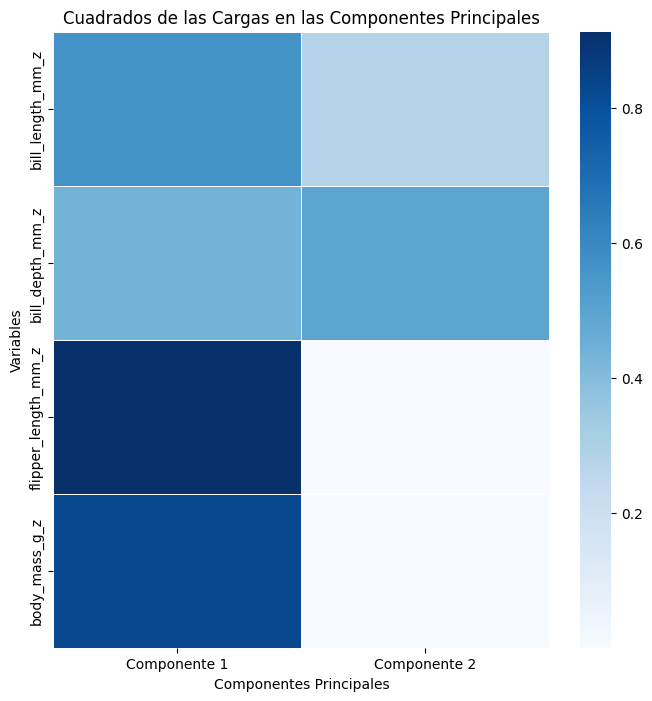

In [35]:
def plot_cos2_heatmap(cosenos2):
    """
    Genera un mapa de calor (heatmap) de los cuadrados de las cargas en las Componentes Principales (cosenos al cuadrado).

    Args:
        cosenos2 (pd.DataFrame): DataFrame de los cosenos al cuadrado, donde las filas representan las variables y las columnas las Componentes Principales.

    """
    # Crea una figura de tamaño 8x8 pulgadas para el gráfico
    plt.figure(figsize=(8, 8))

    # Utiliza un mapa de calor (heatmap) para visualizar 'cos2' con un solo color
    sns.heatmap(cosenos2, cmap='Blues', linewidths=0.5, annot=False)

    # Etiqueta los ejes (puedes personalizar los nombres de las filas y columnas si es necesario)
    plt.xlabel('Componentes Principales')
    plt.ylabel('Variables')

    # Establece el título del gráfico
    plt.title('Cuadrados de las Cargas en las Componentes Principales')

    # Muestra el gráfico
    plt.show()

cos2 = correlaciones_con_componentes **2
plot_cos2_heatmap(cos2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17164\3676708563.py:58: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



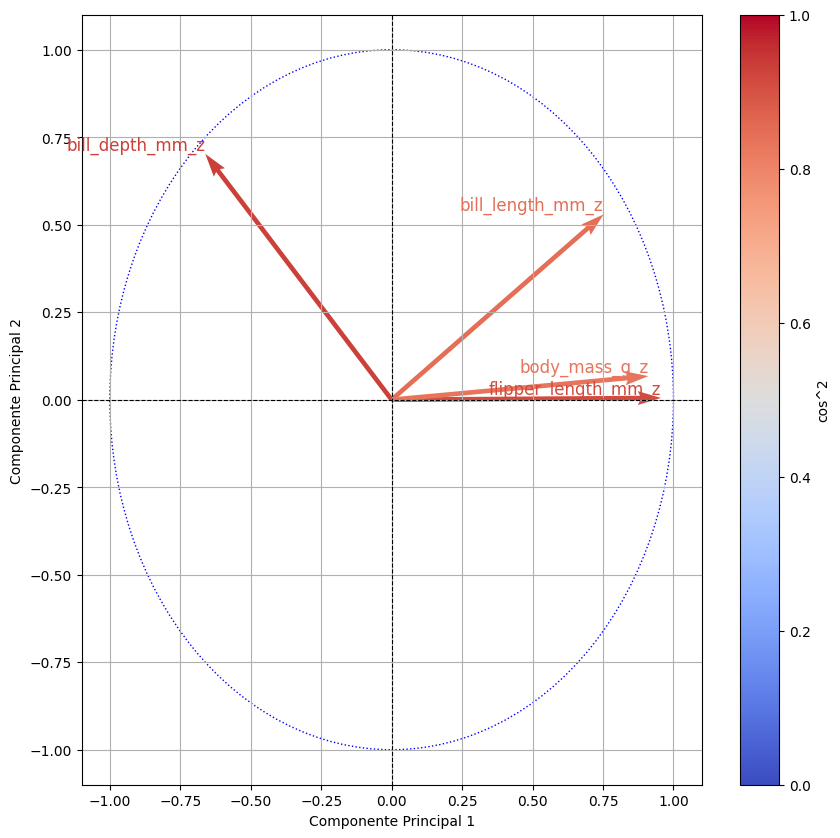

In [36]:
def plot_corr_cos(n_components, correlaciones_datos_con_cp):
    """
    Genera un gráficos en los que se representa un vector por cada variable, usando como ejes las componentes, la orientación
    y la longitud del vector representa la correlación entre cada variable y dos de las componentes. El color representa el
    valor de la suma de los cosenos al cuadrado.

    Args:
        n_components (int): Número entero que representa el número de componentes principales seleccionadas.
        correlaciones_datos_con_cp (DataFrame): DataFrame que contiene la matriz de correlaciones entre variables y componentes
    """
    # Definir un mapa de color (cmap) sensible a las diferencias numéricas

    cmap = plt.get_cmap('coolwarm')  # Puedes ajustar el cmap según tus preferencias


    for i in range(n_components):
        for j in range(i + 1, n_components):  # Evitar pares duplicados
            # Calcular la suma de los cosenos al cuadrado
            sum_cos2 = correlaciones_datos_con_cp.iloc[:, i] ** 2 + correlaciones_datos_con_cp.iloc[:, j] ** 2

            # Crear un nuevo gráfico para cada par de componentes principales
            plt.figure(figsize=(10, 10))

            # Dibujar un círculo de radio 1
            circle = plt.Circle((0, 0), 1, fill=False, color='b', linestyle='dotted')

            plt.gca().add_patch(circle)

            # Dibujar vectores para cada variable con colores basados en la suma de los cosenos al cuadrado
            for k, var_name in enumerate(correlaciones_datos_con_cp.index):
                x = correlaciones_datos_con_cp.iloc[k, i]  # Correlación en la primera dimensión
                y = correlaciones_datos_con_cp.iloc[k, j]  # Correlación en la segunda dimensión

                # Seleccionar un color de acuerdo a la suma de los cosenos al cuadrado
                color = cmap(sum_cos2[k])

                # Dibujar el vector con el color seleccionado
                plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=color)

                # Agregar el nombre de la variable junto a la flecha con el mismo color
                plt.text(x, y, var_name, color=color, fontsize=12, ha='right', va='bottom')

            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')

            # Establecer los límites del gráfico
            plt.xlim(-1.1, 1.1)
            plt.ylim(-1.1, 1.1)

            # Agregar un mapa de color (colorbar) y su leyenda
            sm = plt.cm.ScalarMappable(cmap=cmap)
            sm.set_array([])  # Evita errores de escala
            plt.colorbar(mappable=sm, orientation='vertical', label='cos^2')  # Agrega la leyenda
            # Mostrar el gráfico
            plt.grid()
            plt.show()
            
plot_corr_cos(fit2.n_components, correlaciones_con_componentes)

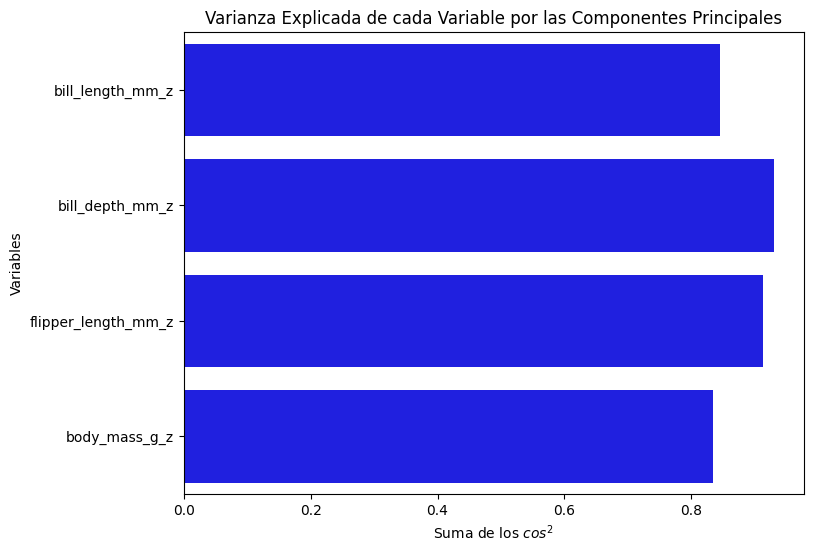

In [37]:
def plot_cos2_bars(cos2):
    """
    Genera un gráfico de barras para representar la varianza explicada de cada variable utilizando los cuadrados de las cargas (cos^2).

    Args:
        cos2 (pd.DataFrame): DataFrame que contiene los cuadrados de las cargas de las variables en las componentes principales.

    Returns:
        None
    """
    # Crea una figura de tamaño 8x6 pulgadas para el gráfico
    plt.figure(figsize=(8, 6))

    # Crea un gráfico de barras para representar la varianza explicada por cada variable
    sns.barplot(x=cos2.sum(axis=1), y=cos2.index, color="blue")

    # Etiqueta los ejes
    plt.xlabel('Suma de los $cos^2$')
    plt.ylabel('Variables')

    # Establece el título del gráfico
    plt.title('Varianza Explicada de cada Variable por las Componentes Principales')

    # Muestra el gráfico
    plt.show()
    

plot_cos2_bars(cos2)

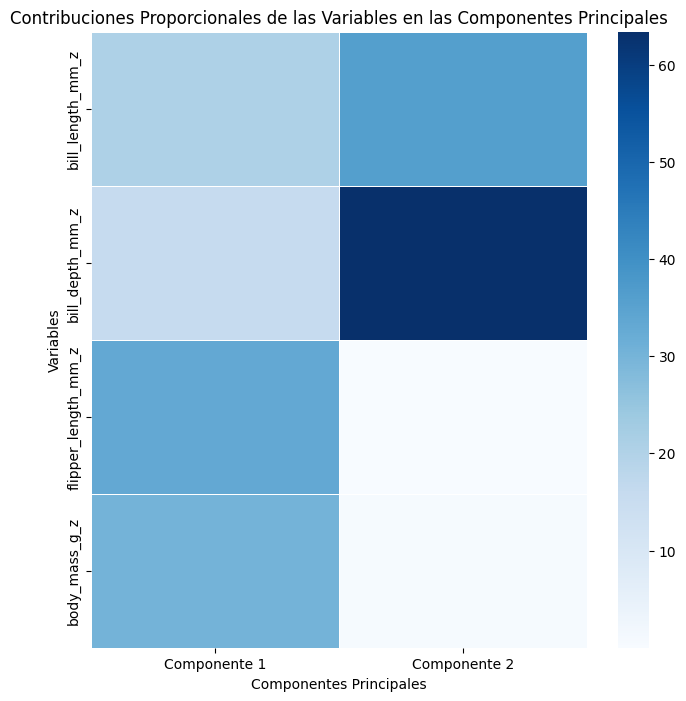

In [38]:
def plot_contribuciones_proporcionales(cos2, autovalores, n_components):
    """
    Cacula las contribuciones de cada variable a las componentes principales y
    Genera un gráfico de mapa de calor con los datos
    Args:
        cos2 (DataFrame): DataFrame de los cuadrados de las cargas (cos^2).
        autovalores (array): Array de los autovalores asociados a las componentes principales.
        n_components (int): Número de componentes principales seleccionadas.
    """
    # Calcula las contribuciones multiplicando cos2 por la raíz cuadrada de los autovalores
    contribuciones = cos2 * np.sqrt(autovalores)

    # Inicializa una lista para las sumas de contribuciones
    sumas_contribuciones = []

    # Calcula la suma de las contribuciones para cada componente principal
    for i in range(n_components):
        nombre_componente = f'Componente {i + 1}'
        suma_contribucion = np.sum(contribuciones[nombre_componente])
        sumas_contribuciones.append(suma_contribucion)

    # Calcula las contribuciones proporcionales dividiendo por las sumas de contribuciones
    contribuciones_proporcionales = contribuciones.div(sumas_contribuciones, axis=1) * 100

    # Crea una figura de tamaño 8x8 pulgadas para el gráfico
    plt.figure(figsize=(8, 8))

    # Utiliza un mapa de calor (heatmap) para visualizar las contribuciones proporcionales
    sns.heatmap(contribuciones_proporcionales, cmap='Blues', linewidths=0.5, annot=False)

    # Etiqueta los ejes (puedes personalizar los nombres de las filas y columnas si es necesario)
    plt.xlabel('Componentes Principales')
    plt.ylabel('Variables')

    # Establece el título del gráfico
    plt.title('Contribuciones Proporcionales de las Variables en las Componentes Principales')

    # Muestra el gráfico
    plt.show()
    
    # Devuelve los DataFrames de contribuciones y contribuciones proporcionales
    return contribuciones_proporcionales

contribuciones_proporcionales = plot_contribuciones_proporcionales(cos2,autovalores2,fit2.n_components)

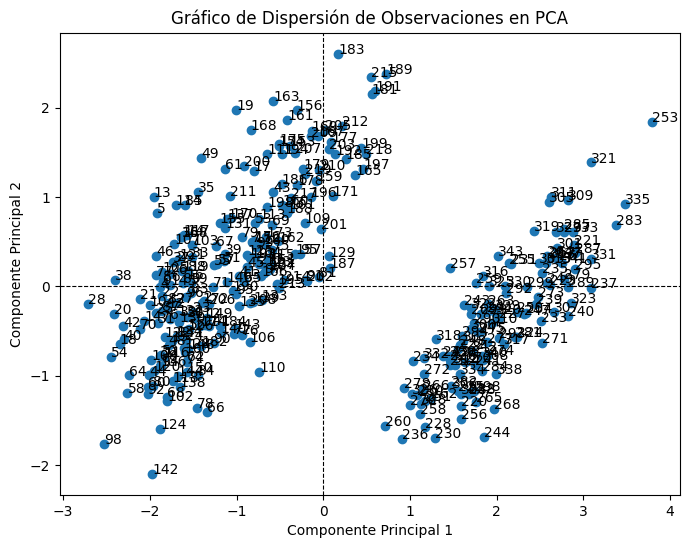

In [39]:
def plot_pca_scatter(pca, datos_estandarizados, n_components):
    """
    Genera gráficos de dispersión de observaciones en pares de componentes principales seleccionados.

    Args:
        pca (PCA): Objeto PCA previamente ajustado.
        datos_estandarizados (pd.DataFrame): DataFrame de datos estandarizados.
        n_components (int): Número de componentes principales seleccionadas.
    """
    # Representamos las observaciones en cada par de componentes seleccionadas
    componentes_principales = pca.transform(datos_estandarizados)
    
    for i in range(n_components):
        for j in range(i + 1, n_components):  # Evitar pares duplicados
            # Calcular la suma de los valores al cuadrado para cada variable
            # Crea un gráfico de dispersión de las observaciones en las dos primeras componentes principales
            plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
            plt.scatter(componentes_principales[:, i], componentes_principales[:, j])
            
            # Añade etiquetas a las observaciones
            etiquetas_de_observaciones = list(datos_estandarizados.index)
    
            for k, label in enumerate(etiquetas_de_observaciones):
                plt.annotate(label, (componentes_principales[k, i], componentes_principales[k, j]))
            
            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
            
            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')
            
            # Establece el título del gráfico
            plt.title('Gráfico de Dispersión de Observaciones en PCA')
            
            plt.show()
            
plot_pca_scatter(pca2, penguins_numericas_estandarizadas, fit2.n_components)

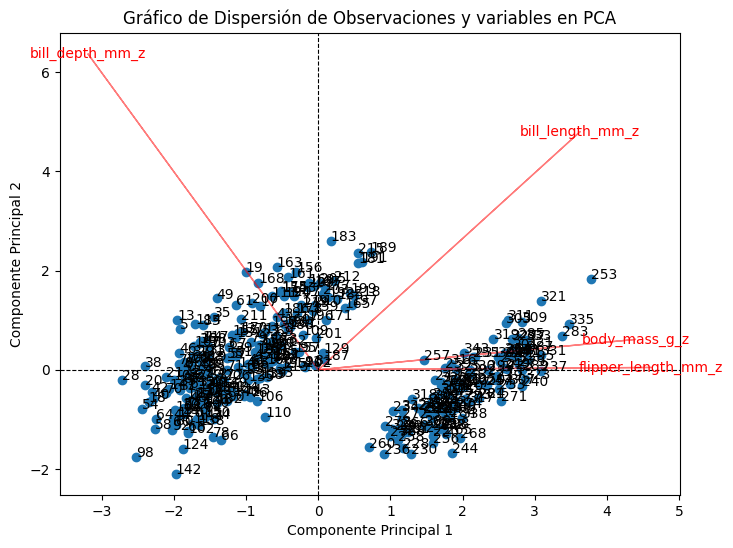

In [40]:
def plot_pca_scatter_with_vectors(pca, datos_estandarizados, n_components, components_):
    """
    Genera gráficos de dispersión de observaciones en pares de componentes principales seleccionados
    con vectores de las correlaciones escaladas entre variables y componentes

    Args:
        pca (PCA): Objeto PCA previamente ajustado.
        datos_estandarizados (pd.DataFrame): DataFrame de datos estandarizados.
        n_components (int): Número de componentes principales seleccionadas.
        components_: Array con las componentes.
    """
    # Representamos las observaciones en cada par de componentes seleccionadas
    componentes_principales = pca.transform(datos_estandarizados)
    
    for i in range(n_components):
        for j in range(i + 1, n_components):  # Evitar pares duplicados
            # Calcular la suma de los valores al cuadrado para cada variable
            # Crea un gráfico de dispersión de las observaciones en las dos primeras componentes principales
            plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
            plt.scatter(componentes_principales[:, i], componentes_principales[:, j])
            
            # Añade etiquetas a las observaciones
            etiquetas_de_observaciones = list(datos_estandarizados.index)
    
            for k, label in enumerate(etiquetas_de_observaciones):
                plt.annotate(label, (componentes_principales[k, i], componentes_principales[k, j]))
            
            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
            
            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')
            
            # Establece el título del gráfico
            plt.title('Gráfico de Dispersión de Observaciones y variables en PCA')
            
            
            # Añadimos vectores que representen las correlaciones escaladas entre variables y componentes
            fit = pca.fit(datos_estandarizados)
            coeff = np.transpose(fit.components_)
            scaled_coeff = 8 * coeff  #8 = escalado utilizado, ajustar en función del ejemplo
            for var_idx in range(scaled_coeff.shape[0]):
                plt.arrow(0, 0, scaled_coeff[var_idx, i], scaled_coeff[var_idx, j], color='red', alpha=0.5)
                plt.text(scaled_coeff[var_idx, i], scaled_coeff[var_idx, j],
                     penguins_numericas_estandarizadas.columns[var_idx], color='red', ha='center', va='center')
            
            plt.show()
            
plot_pca_scatter_with_vectors(pca2, penguins_numericas_estandarizadas, fit2.n_components, fit2.components_)

In [41]:
datos_combinados

bill_length_mm_z  bill_depth_mm_z  flipper_length_mm_z  body_mass_g_z  \
0           -0.896042         0.780732            -1.426752      -0.568475   
1           -0.822788         0.119584            -1.069474      -0.506286   
2           -0.676280         0.424729            -0.426373      -1.190361   
4           -1.335566         1.085877            -0.569284      -0.941606   
5           -0.859415         1.747026            -0.783651      -0.692852   
..                ...              ...                  ...            ...   
338          0.587352        -1.762145             0.931283       0.892957   
340          0.514098        -1.457000             1.002739       0.799674   
341          1.173384        -0.744994             1.502928       1.919069   
342          0.221082        -1.202712             0.788372       1.234995   
343          1.081817        -0.541564             0.859828       1.483749   

     Componente 1  Componente 2  
0       -1.853593      0.032069  
1       -1.316254     -0.443527  
2       -1.376605     -0.161230  
4       -1.885288     -0.012351  
5       -1.919981      0.817598  
..            ...           ...  
338      1.997716     -0.976771  
340      1.832651     -0.784510  
341      2.751505      0.266556  
342      1.713854     -0.725875  
343      2.018537      0.336554  

[333 rows x 6 columns]

In [42]:
penguins_numericas_estandarizadas['species'] = penguins['species']  # Asegúrate de incluir la columna 'species'

# Ahora, concatena los resultados de PCA (asegúrate de que resultados_pca tenga los nombres 'Componente 1' y 'Componente 2')
datos_combinados = pd.concat([penguins_numericas_estandarizadas, resultados_pca], axis=1)

# Asegúrate de que 'Componente 1' y 'Componente 2' estén definidos correctamente en resultados_pca
# Si no, ajusta los nombres de las columnas según sea necesario

# Corrige el mapa de colores para coincidir con los nombres correctos de las especies
import plotly.express as px
fig = px.scatter(data_frame=datos_combinados, 
           x='Componente 1', y='Componente 2',
           color='species', 
           color_discrete_map={'Adelie':'rgb(230,100,240)', 'Chinstrap':'rgb(10,98,100)', 'Gentoo':'rgb(90,60,90)'},
           symbol='species',
           symbol_map={'Adelie':'circle', 'Chinstrap':'triangle-up', 'Gentoo':'square'},         
           )
fig.update_traces(marker=dict(size=9))
fig.update_layout(title='Componente principal 1 vs Componente principal 2',
                  titlefont=dict(color='black', family='Open Sans'), 
                  )
fig.show()

In [43]:
# Calculamos las medias estandarizadas para cada especie
adelie_means = penguins_numericas_estandarizadas[penguins['species'] == 'Adelie'].mean()
chinstrap_means = penguins_numericas_estandarizadas[penguins['species'] == 'Chinstrap'].mean()
print(adelie_means)
print(chinstrap_means)

bill_length_mm_z      -0.946592
bill_depth_mm_z        0.601337
flipper_length_mm_z   -0.776310
body_mass_g_z         -0.622996
dtype: float64
bill_length_mm_z       0.886562
bill_depth_mm_z        0.638630
flipper_length_mm_z   -0.367527
body_mass_g_z         -0.589509
dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17164\2917248205.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17164\2917248205.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [44]:
# Obtenemos las cargas del primer componente principal
cargas_pc1 = pca.components_[0]
cargas_pc1

array([ 0.45375317, -0.39904723,  0.576825  ,  0.54967471])

In [45]:
indice_adelie = np.dot(adelie_means, cargas_pc1)
indice_chinstrap = np.dot(chinstrap_means, cargas_pc1)

indice_adelie, indice_chinstrap

(-1.4597214389967106, -0.38860034552225986)

# CLUSTERING JERARQUICO

Matriz de distancias: calculamos las distnacias euclídeas entre las observaciones con los valores sin estandarizar.

In [46]:
variables_numericas

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [47]:
from scipy.spatial import distance

distance_matrix = distance.cdist(penguins[variables_numericas], penguins[variables_numericas], 'euclidean')
distance_small = distance_matrix[:5, :5]
distance_small = pd.DataFrame(distance_small, index=penguins.index[:5], columns=penguins.index[:5])

distance_small_rounded = distance_small.round(2)

print('Distance Matrix for the first 5 observations:\n', distance_small_rounded)

Distance Matrix for the first 5 observations:
         0       1       2       4       5
0    0.00   50.27  500.20  300.25  100.42
1   50.27    0.00  550.07  350.09  150.09
2  500.20  550.07    0.00  200.05  400.04
4  300.25  350.09  200.05    0.00  200.04
5  100.42  150.09  400.04  200.04    0.00


Representación ahora mediante escalas de color la distancia entre todas las observaciones:

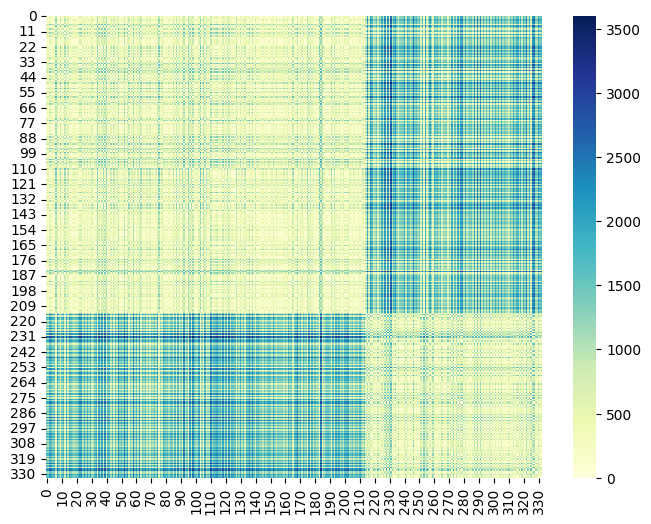

In [48]:
# Asegurándonos de que el tamaño de la figura es adecuado para la visualización del mapa de calor
plt.figure(figsize=(8, 6))

# Corregimos el uso de argumentos en sns.heatmap
# Eliminamos los espacios adicionales y corregimos el uso de comillas en "cmap"
# Nota: 'fmt' no es necesario si 'annot' es False
sns.heatmap(distance_matrix, annot=False, cmap="YlGnBu")

# Mostramos el gráfico
plt.show()

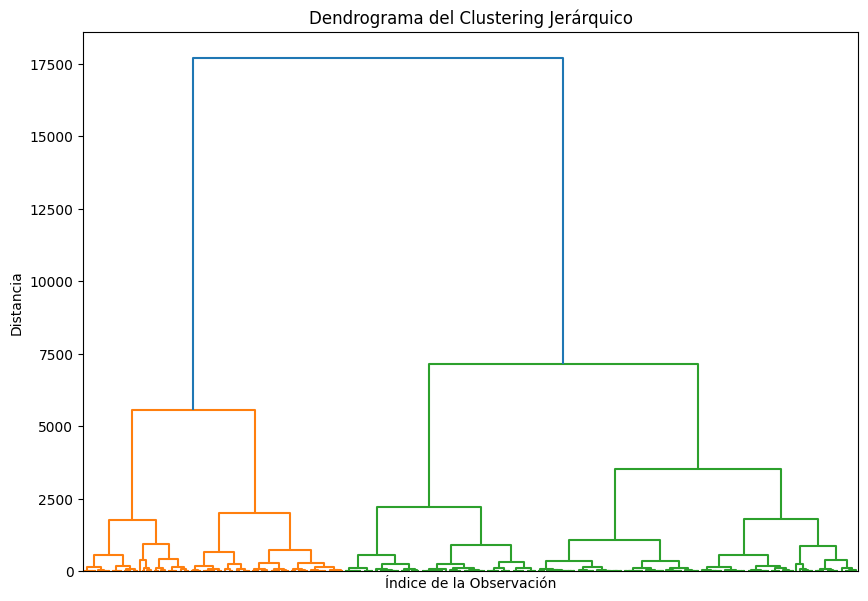

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Realizamos el clustering jerárquico usando la matriz de distancia
# 'ward' es uno de los métodos que se pueden utilizar para calcular las distancias entre los clusters
# Suponiendo que distance_matrix es tu matriz de distancias completa
distance_matrix_condensed = squareform(distance_matrix)

# Ahora puedes usar distance_matrix_condensed con linkage
Z = linkage(distance_matrix_condensed, 'ward')

# Creamos un dendrograma para visualizar el clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, no_labels=True)  # no_labels=True para no mostrar las etiquetas debido a la gran cantidad de observaciones
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índice de la Observación')
plt.ylabel('Distancia')
plt.show()


C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



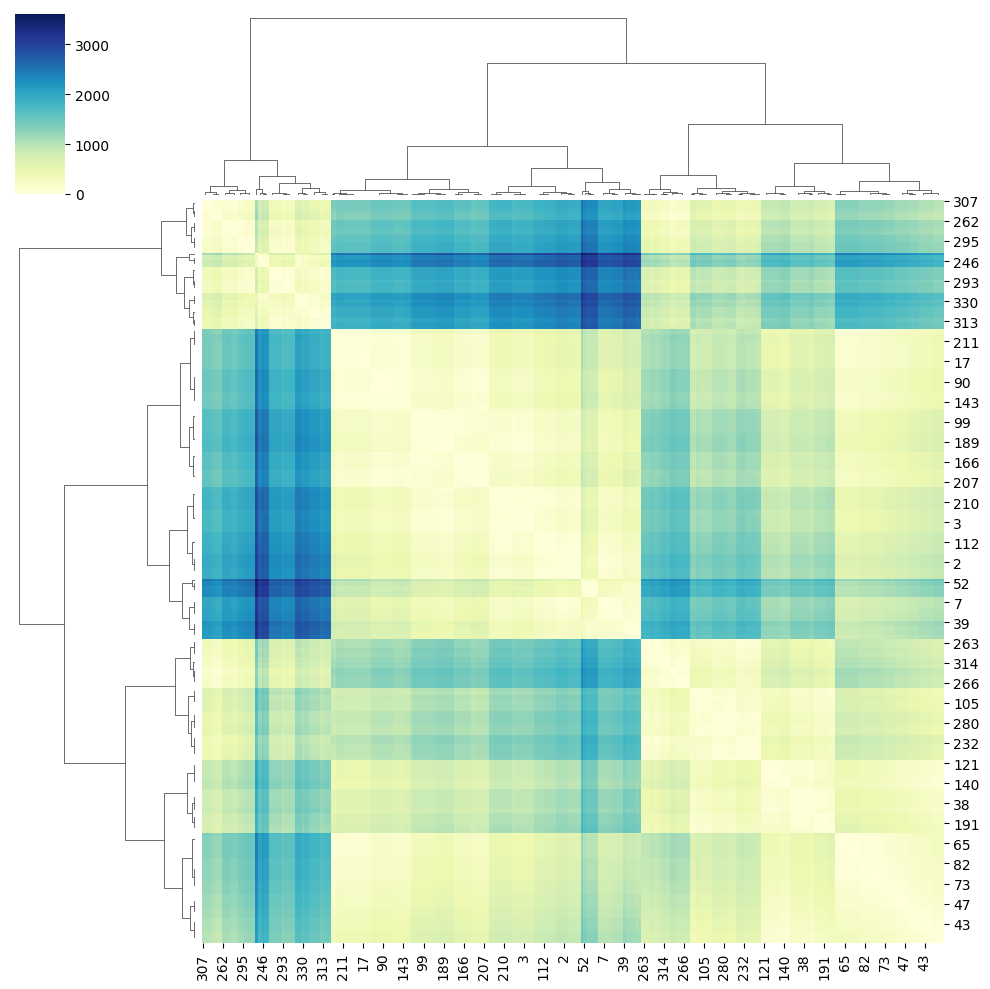

IndexError: positional indexers are out-of-bounds

In [50]:
# Asumimos que 'df_distance' es tu matriz de distancias y 'df' son tus datos originales.
# Asegúrate de que ambos están correctamente definidos y preparados para este análisis.

# Realiza el clustering jerárquico para obtener la matriz de enlace
# Nota: La función clustermap realiza el clustering pero no es directamente utilizada para obtener la matriz de enlace de esta manera.
clustermap_result = sns.clustermap(distance_matrix, cmap="YlGnBu", annot=False, method='ward')
plt.show()

# Extraemos la matriz de enlace de los resultados de clustermap
linkage_matrix = clustermap_result.dendrogram_row.linkage

# Para reordenar los datos según el clustering jerárquico, podemos usar el orden de las hojas del dendrograma
reordered_index = clustermap_result.dendrogram_row.reordered_ind
reordered_data = penguins.iloc[reordered_index, reordered_index]

# Finalmente, mostramos el mapa de calor de los datos reordenados
# Aquí, asumimos que 'df' es cuadrado y simétrico, como sería una matriz de distancias o similitudes.
# Si 'df' contiene datos diferentes, ajusta 'reordered_data' para reflejar cómo quieres reordenarlos.
sns.heatmap(reordered_data, cmap="YlGnBu", annot=False, cbar=False)
plt.show()

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning:

All-NaN slice encountered

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning:

All-NaN slice encountered



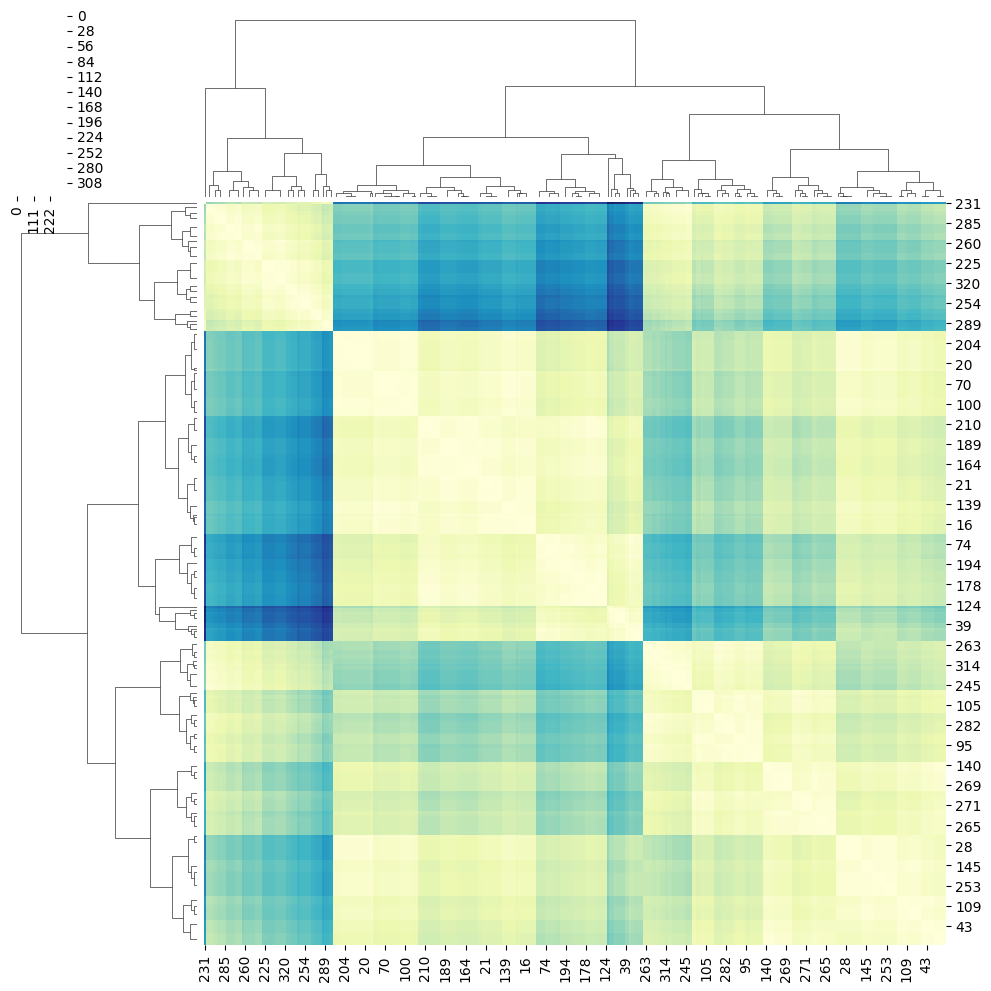

In [51]:
linkage = sns.clustermap(distance_matrix,cmap='YlGnBu', fmt = '.1f', annot=False, method='average').dendrogram_row.linkage
order = pd.DataFrame(linkage,columns = ['cluster_1','cluster_2','distance','new_count']).index
reordered_data= penguins.reindex(index=order,columns=order)

sns.heatmap(reordered_data,cmap='YlGnBu', fmt='.1f',cbar=False)
plt.show()


In [52]:
penguins_numericas_estandarizadas_sinespecie = penguins_numericas_estandarizadas.drop('species',axis = 1)
penguins_numericas_estandarizadas_sinespecie

bill_length_mm_z  bill_depth_mm_z  flipper_length_mm_z  body_mass_g_z
0           -0.896042         0.780732            -1.426752      -0.568475
1           -0.822788         0.119584            -1.069474      -0.506286
2           -0.676280         0.424729            -0.426373      -1.190361
4           -1.335566         1.085877            -0.569284      -0.941606
5           -0.859415         1.747026            -0.783651      -0.692852
..                ...              ...                  ...            ...
338          0.587352        -1.762145             0.931283       0.892957
340          0.514098        -1.457000             1.002739       0.799674
341          1.173384        -0.744994             1.502928       1.919069
342          0.221082        -1.202712             0.788372       1.234995
343          1.081817        -0.541564             0.859828       1.483749

[333 rows x 4 columns]

Calculo de la matriz de distancias de las variables estadarizadas: 

In [53]:
distance_std = distance.cdist(penguins_numericas_estandarizadas_sinespecie, penguins_numericas_estandarizadas_sinespecie,'euclidean')
print(distance_std[:5,:5].round(2))

[[0.   0.76 1.25 1.08 1.17]
 [0.76 0.   1.   1.28 1.66]
 [1.25 1.   0.   0.98 1.47]
 [1.08 1.28 0.98 0.   0.88]
 [1.17 1.66 1.47 0.88 0.  ]]


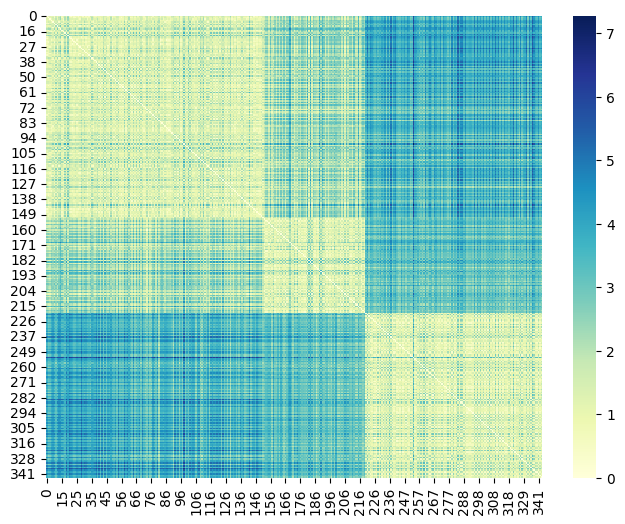

In [54]:
plt.figure(figsize=(8,6))
df_std_distance= pd.DataFrame(distance_std, index = penguins_numericas_estandarizadas_sinespecie.index, columns=penguins.index)
sns.heatmap(df_std_distance, annot=False, cmap ='YlGnBu', fmt='.1f')
plt.show()

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



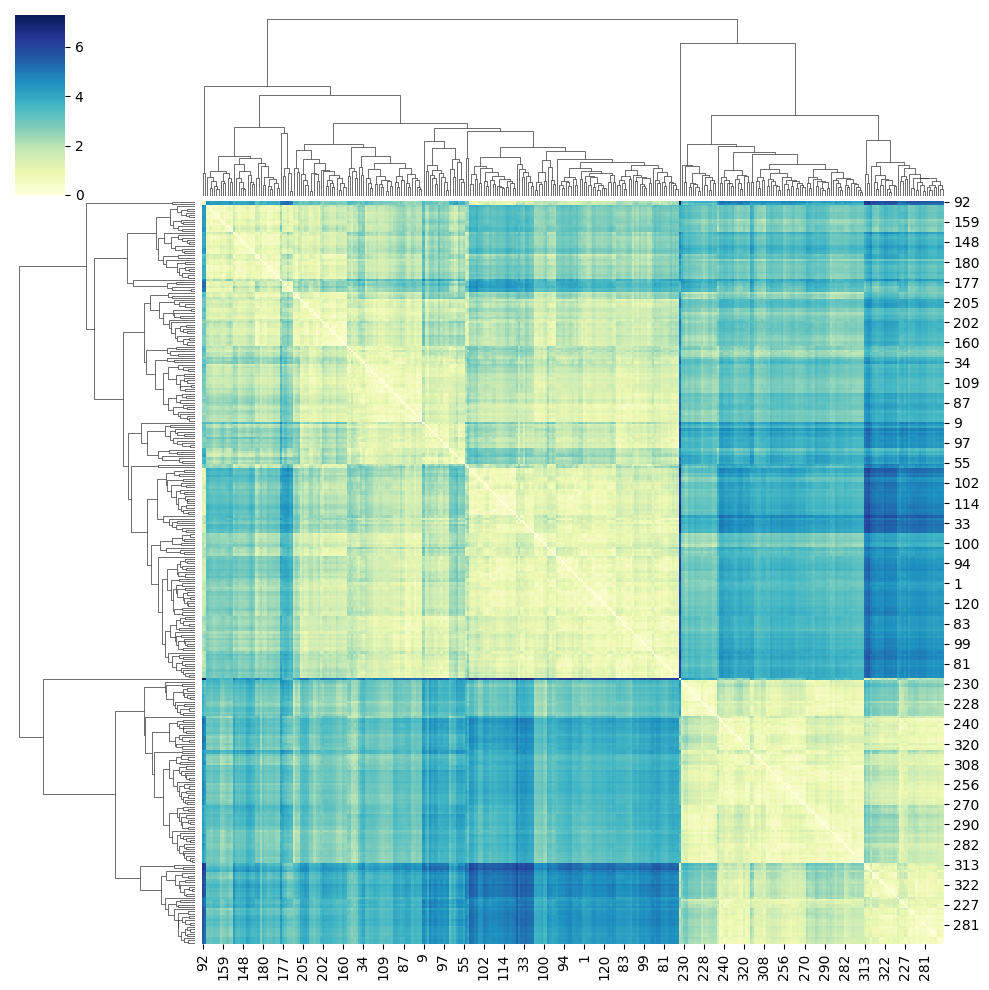

IndexError: positional indexers are out-of-bounds

In [55]:
# Asumimos que 'df_distance' es tu matriz de distancias y 'df' son tus datos originales.
# Asegúrate de que ambos están correctamente definidos y preparados para este análisis.

# Realiza el clustering jerárquico para obtener la matriz de enlace
# Nota: La función clustermap realiza el clustering pero no es directamente utilizada para obtener la matriz de enlace de esta manera.
clustermap_result = sns.clustermap(distance_std, cmap="YlGnBu", annot=False, method='average')
plt.show()

# Extraemos la matriz de enlace de los resultados de clustermap
linkage_matrix = clustermap_result.dendrogram_row.linkage

# Para reordenar los datos según el clustering jerárquico, podemos usar el orden de las hojas del dendrograma
reordered_index = clustermap_result.dendrogram_row.reordered_ind
reordered_data = penguins.iloc[reordered_index, reordered_index]

# Finalmente, mostramos el mapa de calor de los datos reordenados
# Aquí, asumimos que 'df' es cuadrado y simétrico, como sería una matriz de distancias o similitudes.
# Si 'df' contiene datos diferentes, ajusta 'reordered_data' para reflejar cómo quieres reordenarlos.
sns.heatmap(reordered_data, cmap="YlGnBu", annot=False, cbar=False)
plt.show()

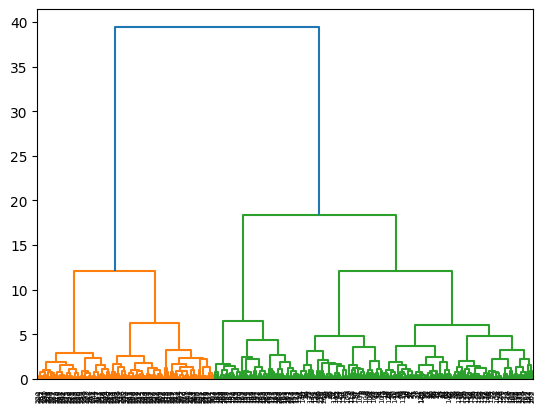

In [56]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='ward')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

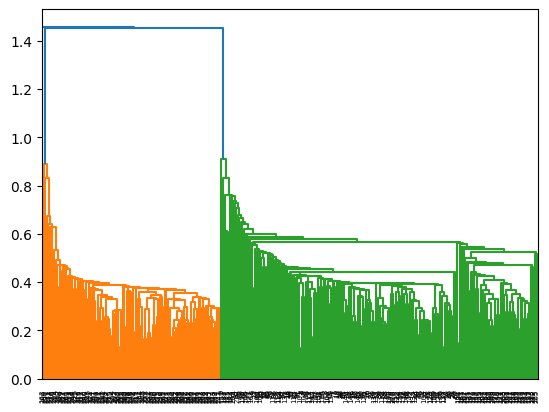

In [57]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='single')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

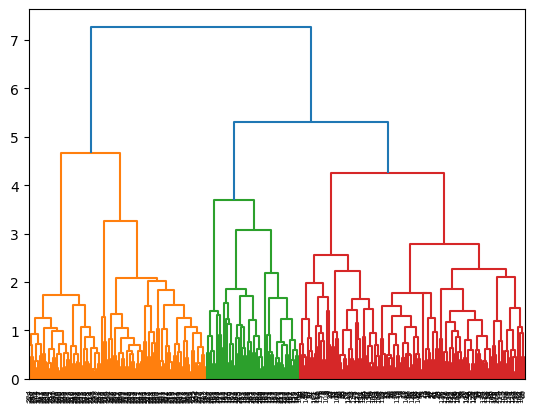

In [58]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='complete')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

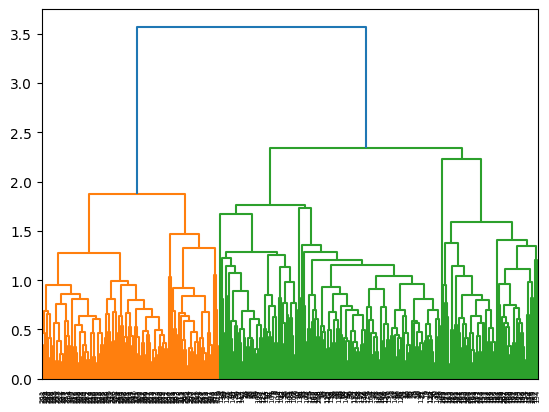

In [59]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='average')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

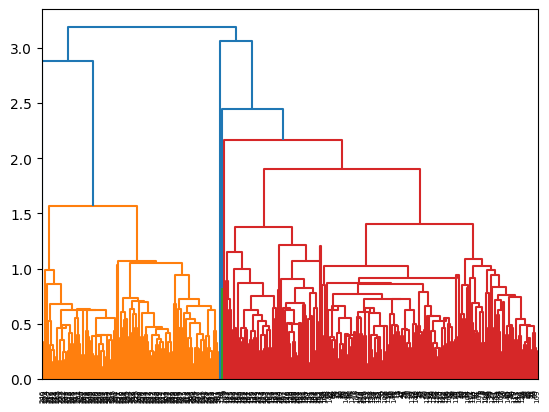

In [60]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='centroid')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

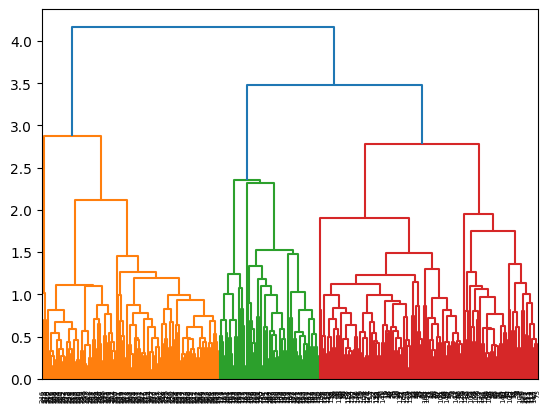

In [61]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='weighted')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

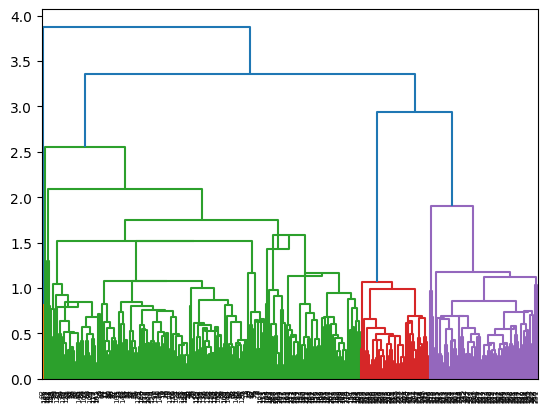

In [62]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='median')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

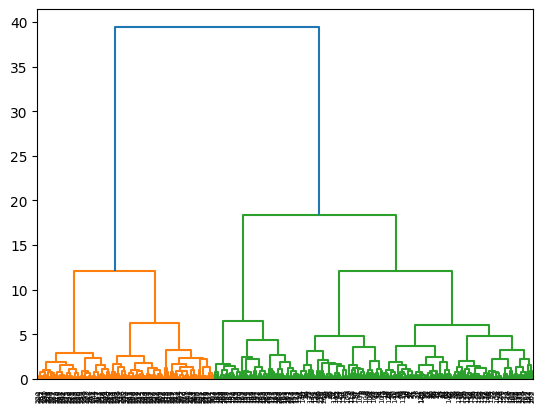

In [63]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
# Convertir la matriz de distancias completa a una forma condensada
distance_condensed = squareform(distance_std)

# Ahora puedes usar la matriz de distancias condensada con linkage
linkage_matrix_std = sch.linkage(distance_condensed, method='ward')

# Dibuja el dendrograma
dendrogram = sch.dendrogram(linkage_matrix_std)
plt.show()

Un número adecuado de clusters podría ser 3 (obvio ya que hay 3 especies...)

In [64]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3
cluster_assignments = fcluster(linkage_matrix_std,num_clusters,criterion='maxclust')

print("Cluster Assignments:", cluster_assignments)
plt.show()

Cluster Assignments: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2
 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 2 3 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [65]:
penguins['Cluster3']=cluster_assignments
print(penguins['Cluster3'])

0      3
1      3
2      3
4      3
5      3
      ..
338    1
340    1
341    1
342    1
343    1
Name: Cluster3, Length: 333, dtype: int32


Clustering coloreado:

In [66]:
resultados_pca2

Componente 1  Componente 2
0       -1.853593      0.032069
1       -1.316254     -0.443527
2       -1.376605     -0.161230
4       -1.885288     -0.012351
5       -1.919981      0.817598
..            ...           ...
338      1.997716     -0.976771
340      1.832651     -0.784510
341      2.751505      0.266556
342      1.713854     -0.725875
343      2.018537      0.336554

[333 rows x 2 columns]

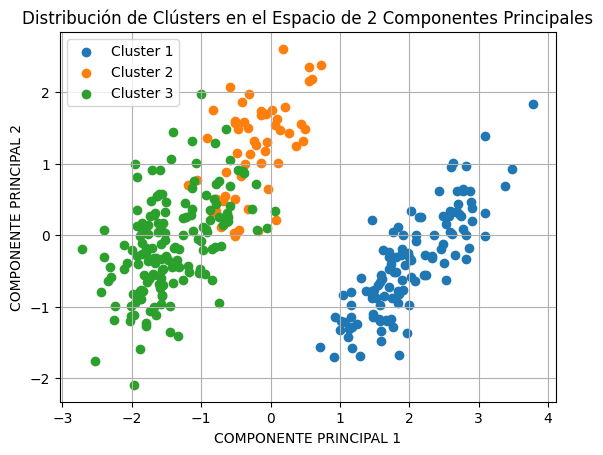

In [67]:
for cluster in np.unique(cluster_assignments):
    plt.scatter(resultados_pca2.loc[cluster_assignments==cluster,'Componente 1'],resultados_pca2.loc[cluster_assignments==cluster,'Componente 2'], label=f'Cluster {cluster}')

plt.title('Distribución de Clústers en el Espacio de 2 Componentes Principales')
plt.xlabel('COMPONENTE PRINCIPAL 1')
plt.ylabel('COMPONENTE PRINCIPAL 2')
plt.legend()
plt.grid()
plt.show()

# KMEANS

In [68]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(penguins_numericas_estandarizadas_sinespecie)
kmeans_cluster_labels = kmeans.labels_

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



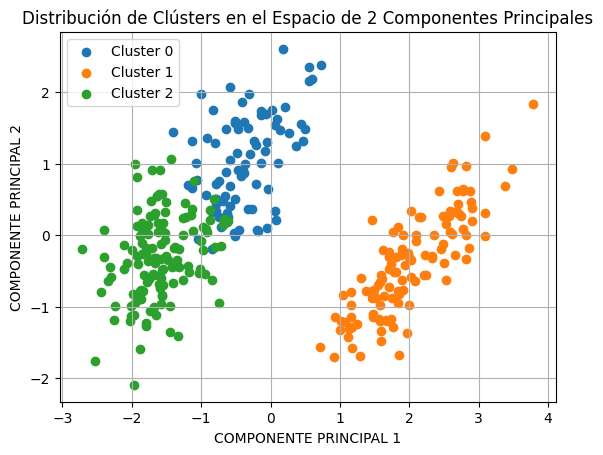

In [69]:
# Ahora replicamos la gráfica utilizando las etiquetas de clúster de k-means
for cluster in np.unique(kmeans_cluster_labels):
    plt.scatter(resultados_pca2.loc[kmeans_cluster_labels==cluster,'Componente 1'],
                resultados_pca2.loc[kmeans_cluster_labels==cluster,'Componente 2'],
                label=f'Cluster {cluster}')

plt.title('Distribución de Clústers en el Espacio de 2 Componentes Principales')
plt.xlabel('COMPONENTE PRINCIPAL 1')
plt.ylabel('COMPONENTE PRINCIPAL 2')
plt.legend()
plt.grid()
plt.show()

## Método del codo

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming

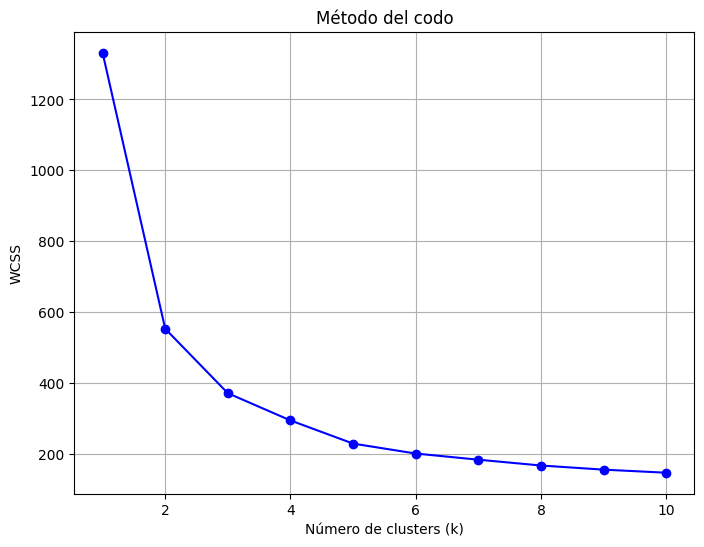

In [70]:
wcss = []
for k in range(1,11): #probamos con varios k
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(penguins_numericas_estandarizadas_sinespecie)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss,marker='o',linestyle='-',color='b')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## Método de la silueta

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming

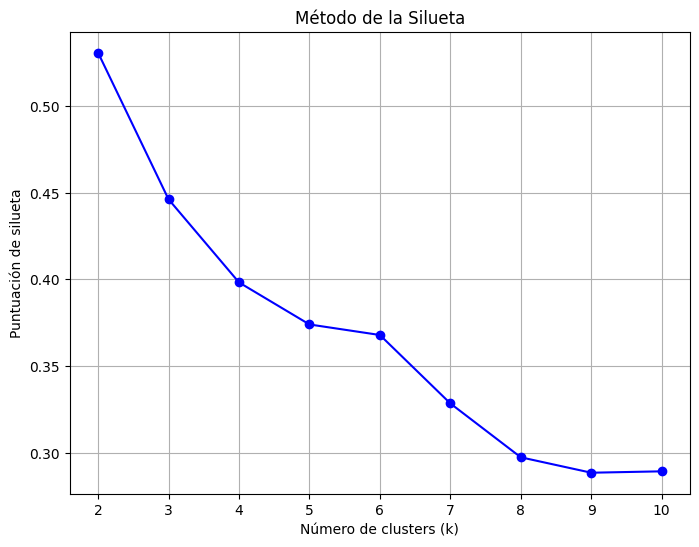

In [71]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(penguins_numericas_estandarizadas_sinespecie)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(penguins_numericas_estandarizadas_sinespecie,labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(8,6))
plt.plot(range(2,11),silhouette_scores, marker='o',linestyle='-', color='b')
plt.title('Método de la Silueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntuación de silueta')
plt.grid(True)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17164\3411972481.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



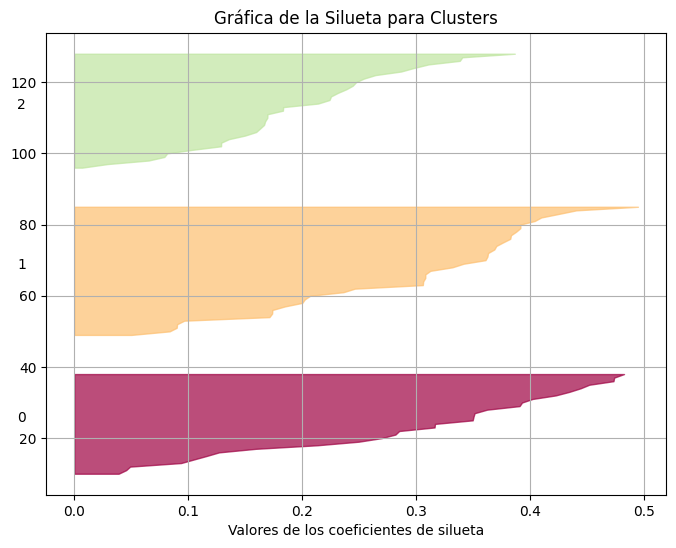

In [72]:
from sklearn.metrics import silhouette_samples
silhouette_values = silhouette_samples(penguins_numericas_estandarizadas_sinespecie, labels)
plt.figure(figsize=(8,6))
y_lower =10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_values[labels==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper =y_lower+size_cluster_i

    color = plt.cm.get_cmap('Spectral')(float(i)/3)
    plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05,y_lower+0.5*size_cluster_i, str(i))
    y_lower = y_upper +10

plt.title('Gráfica de la Silueta para Clusters')
plt.xlabel('Valores de los coeficientes de silueta')
plt.grid(True)
plt.show()

In [73]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(penguins_numericas_estandarizadas_sinespecie)
labels=kmeans.labels_

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [74]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  Cluster3  
0         3750.0    Male         3  
1         3800.0  Female         3  
2         3250.0  Female         3  
4         3450.0  Female         3  
5         3650.0    Male         3  
..           ...     ...       ...  
338       4925.0  Female         1  
340       4850.0  Female         1  
341       5750.0    Male         1  
342       5200.0  Female         1  
343       5400.0    Male         1  

[333 rows x 8 columns]

In [75]:
penguins_numericas_estandarizadas['label'] = labels
df_std_sort = penguins_numericas_estandarizadas.sort_values(by='label')
df_std_sort

bill_length_mm_z  bill_depth_mm_z  flipper_length_mm_z  body_mass_g_z  \
209          0.971936         1.391023             0.145272      -0.195343   
152          0.459158         0.373872            -0.640740      -0.879418   
153          1.100130         1.187592            -0.354918      -0.381909   
154          1.338206         1.035020            -0.569284      -0.692852   
155          0.257709         0.780732            -0.926562      -0.848323   
..                ...              ...                  ...            ...   
116         -0.987609        -0.083846            -0.926562      -1.625681   
117         -1.225685         1.696168            -0.140551      -0.537380   
118         -1.518701        -0.083846            -0.855107      -1.065984   
206         -0.273383         0.068726            -0.998018      -1.065984   
172         -0.291696         0.068726            -1.426752      -0.755041   

       species  label  
209  Chinstrap      0  
152  Chinstrap      0  
153  Chinstrap      0  
154  Chinstrap      0  
155  Chinstrap      0  
..         ...    ...  
116     Adelie      2  
117     Adelie      2  
118     Adelie      2  
206  Chinstrap      2  
172  Chinstrap      2  

[333 rows x 6 columns]

In [76]:
cluster_centroids = df_std_sort.groupby('label').mean()
cluster_centroids.round(2)

penguins['label']=labels
penguins_sort = penguins.sort_values(by='label')

cluster_centroids_orig = penguins_sort.groupby('label').mean()
cluster_centroids_orig.round(2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17164\3308276339.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17164\3308276339.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  Cluster3
label                                                                         
0               47.66          18.75             196.92      3898.24      2.33
1               47.57          15.00             217.24      5092.44      1.00
2               38.28          18.12             188.63      3593.80      3.00

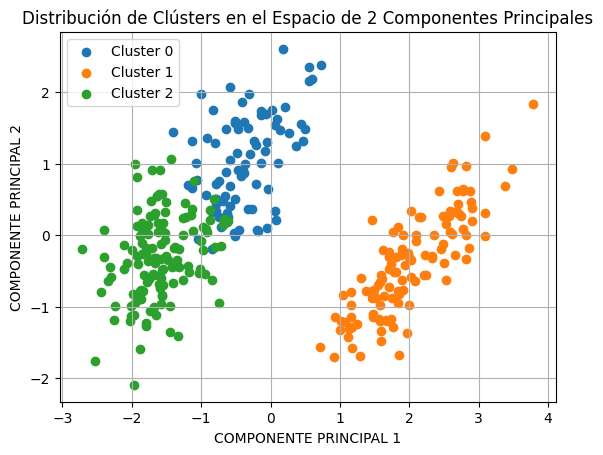

In [77]:
# Ahora replicamos la gráfica utilizando las etiquetas de clúster de k-means
for cluster in np.unique(kmeans_cluster_labels):
    plt.scatter(resultados_pca2.loc[kmeans_cluster_labels==cluster,'Componente 1'],
                resultados_pca2.loc[kmeans_cluster_labels==cluster,'Componente 2'],
                label=f'Cluster {cluster}')

plt.title('Distribución de Clústers en el Espacio de 2 Componentes Principales')
plt.xlabel('COMPONENTE PRINCIPAL 1')
plt.ylabel('COMPONENTE PRINCIPAL 2')
plt.legend()
plt.grid()
plt.show()

In [78]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  Cluster3  label  
0         3750.0    Male         3      2  
1         3800.0  Female         3      2  
2         3250.0  Female         3      2  
4         3450.0  Female         3      2  
5         3650.0    Male         3      2  
..           ...     ...       ...    ...  
338       4925.0  Female         1      1  
340       4850.0  Female         1      1  
341       5750.0    Male         1      1  
342       5200.0  Female         1      1  
343       5400.0    Male         1      1  

[333 rows x 9 columns]

In [84]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

le = LabelEncoder()
species_encoded = le.fit_transform(penguins['species'])

homogeneity_cluster3 = homogeneity_score(species_encoded, penguins['Cluster3'])
completeness_cluster3 = completeness_score(species_encoded, penguins['Cluster3'])
v_measure_cluster3 = v_measure_score(species_encoded, penguins['Cluster3'])

print("Métricas para Clustering Jerárquico:")
print(f"Homogeneidad: {homogeneity_cluster3}")
print(f"Plenitud: {completeness_cluster3}")
print(f"V-measure: {v_measure_cluster3}")

homogeneity_label = homogeneity_score(species_encoded, penguins['label'])
completeness_label = completeness_score(species_encoded, penguins['label'])
v_measure_label = v_measure_score(species_encoded, penguins['label'])

print("\nMétricas para KMeans:")
print(f"Homogeneidad: {homogeneity_label}")
print(f"Plenitud: {completeness_label}")
print(f"V-measure: {v_measure_label}")

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

pureza_cluster3 = purity_score(species_encoded, penguins['Cluster3'])
pureza_label = purity_score(species_encoded, penguins['label'])

print("\nPureza para Clustering Jerárquico:", pureza_cluster3)
print("Pureza para KMeans:", pureza_label)

Métricas para Clustering Jerárquico:
Homogeneidad: 0.8864308434649981
Plenitud: 0.911771439415769
V-measure: 0.8989225892804699

Métricas para KMeans:
Homogeneidad: 0.8011796667633956
Plenitud: 0.7789952904660462
V-measure: 0.7899317532789121

Pureza para Clustering Jerárquico: 0.9669669669669669
Pureza para KMeans: 0.918918918918919


C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Usuario\AppData\Roaming

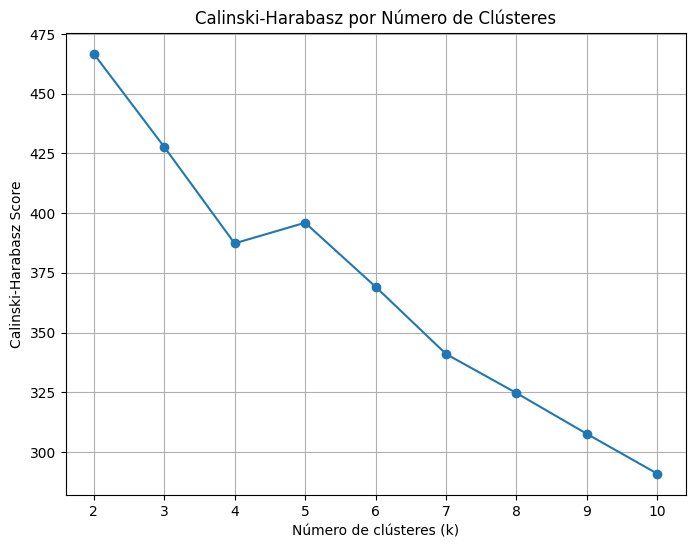

In [81]:
from sklearn.metrics import calinski_harabasz_score

# Asumiendo que penguins_numericas_estandarizadas_sinespecie son tus datos

calinski_harabasz_scores = []

# Calcula el índice de Calinski-Harabasz para diferentes números de clústeres
for k in range(2, 11):  # Supongamos que queremos probar de k=2 a k=10
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(penguins_numericas_estandarizadas_sinespecie)
    labels = kmeans.labels_
    score = calinski_harabasz_score(penguins_numericas_estandarizadas_sinespecie, labels)
    calinski_harabasz_scores.append(score)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', linestyle='-')
plt.title('Calinski-Harabasz por Número de Clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()